## from sampling distribution to confidence interval


## how do we use sampling distributions 
to infer where a parameter is located?

## 신뢰구간, 유의도 관련이네 
confidence interval 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
np.random.seed(42)

In [3]:
coffee_full = pd.read_csv('coffee_dataset.csv')

In [4]:
coffee_full

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226
...,...,...,...,...
2969,5984,>=21,True,68.544084
2970,5302,<21,True,63.822921
2971,5978,>=21,True,67.298275
2972,3900,<21,False,60.095933


In [5]:
coffee_red = coffee_full.sample(200)

In [8]:
coffee_red.shape, coffee_full.shape

((200, 4), (2974, 4))

In [12]:
# 1. what is the propotion of coffee drinkers in the sample?
# what is the propotion of individuals that don't drink coffe??

query_y = 'drinks_coffee == True'
query_n = 'drinks_coffee == False'

In [16]:
coffee_red.query(query_y).shape[0]/coffee_red.shape[0]

0.595

In [17]:
coffee_red.query(query_n).shape[0]/coffee_red.shape[0]

0.405

In [20]:
# average hieght
coffee_red.query(query_y)['height'].mean()

68.11962990858618

In [21]:
coffee_red.query(query_n)['height'].mean()

66.78492279927877

In [38]:
# 3. simulate 200 " new" individual of 200 
sample_df = coffee_red.sample(200, replace=True)

In [39]:
sample_df.query(query_y).shape[0]/sample_df.shape[0]

0.585

In [40]:
sample_df.query(query_n).shape[0]/sample_df.shape[0]

0.415

In [42]:
sample_df['drinks_coffee'].mean()

0.585

(array([  11.,   77.,  451., 1526., 2853., 2933., 1562.,  478.,   98.,
          11.]),
 array([65.17441573, 65.49429857, 65.81418142, 66.13406426, 66.45394711,
        66.77382995, 67.0937128 , 67.41359564, 67.73347848, 68.05336133,
        68.37324417]),
 <BarContainer object of 10 artists>)

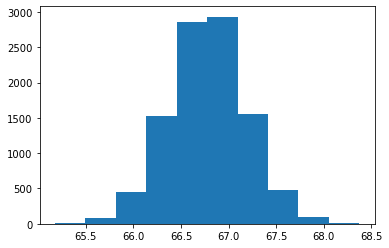

In [43]:
#  4. simulate bootstrap sample 10000 times, 
# mean height of non-drnker in each sample 

boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace=True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means)

In [44]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.98804599318586, 67.5827405841188)

In [45]:
# 5. Did yout interval campture the actual average 

coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean()

66.44340776214703